Arewa Data Science Academy

Deep Learning Cohort2.0

Name: Abdulkadir Shehu Bichi

Email: abdulkadirshehubichi@gmail.com

Title: Week 6 Solution

Exercises Solution

In [1]:
!pip install torchmetrics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import os
import zipfile
from pathlib import Path

import requests

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi data...")
    zip_ref.extractall(image_path)

# Remove zip file
os.remove(data_path / "pizza_steak_sushi.zip")


Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from torchmetrics import Accuracy
import os

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


Using device: cpu


In [4]:
# load the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder(root='/content/data/pizza_steak_sushi/train', transform=transform)
test_data = datasets.ImageFolder(root='/content/data/pizza_steak_sushi/test', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

class_names = train_data.classes
print(class_names)


['pizza', 'steak', 'sushi']


In [5]:
# Load Pretrained Model (Transfer Learning

model = models.efficientnet_b0(pretrained=True)

# Freeze the base layers
for param in model.features.parameters():
    param.requires_grad = False

# Change classifier head
model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(in_features=1280, out_features=len(class_names))
)

model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 100MB/s]


In [6]:
# Train the Model (Transfer Learning)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

NUM_EPOCHS = 5

for epoch in range(NUM_EPOCHS):
    model.train()
    running_loss = 0
    running_acc = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        preds = torch.argmax(y_pred, dim=1)
        running_acc += (preds == y).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_acc / len(train_data)
    print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.4f}")


Epoch 1: Loss = 0.9960, Accuracy = 0.5156
Epoch 2: Loss = 0.8809, Accuracy = 0.6844
Epoch 3: Loss = 0.7430, Accuracy = 0.7867
Epoch 4: Loss = 0.6709, Accuracy = 0.8400
Epoch 5: Loss = 0.5731, Accuracy = 0.8844


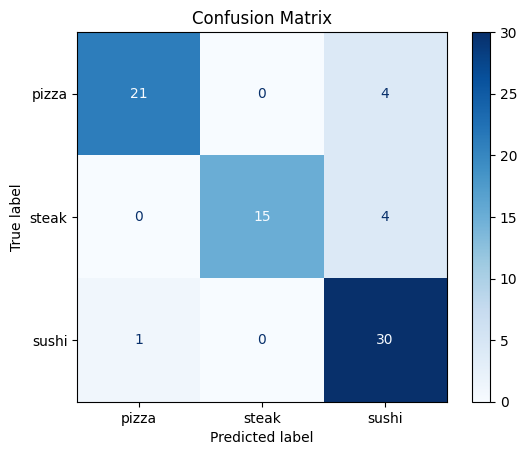

In [7]:
# Question 1. Make predictions on the entire test dataset and plot a confusion matrix for the results of our model compared to the truth labels. Check out 03. PyTorch Computer Vision section 10 for ideas.
y_true = []
y_pred = []

model.eval()
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(y.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


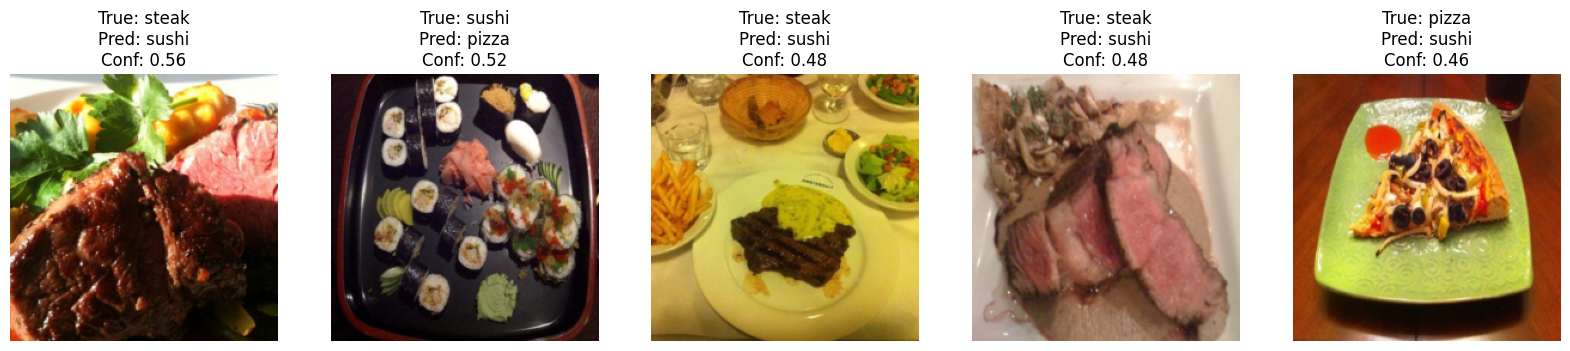

In [8]:
#Question 2.  Get the "most wrong" of the predictions on the test dataset and plot the 5 "most wrong" images. You can do this by:
#Predicting across all of the test dataset, storing the labels and predicted probabilities.
#Sort the predictions by wrong prediction and then descending predicted probabilities, this will give you the wrong predictions with the highest prediction probabilities, in other words, the "most wrong".
#Plot the top 5 "most wrong" images, why do you think the model got these wrong?

import torch.nn.functional as F

wrong_images = []
wrong_labels = []
wrong_preds = []
wrong_probs = []

model.eval()
with torch.no_grad():
    for X, y in test_loader:
        X, y = X.to(device), y.to(device)
        probs = F.softmax(model(X), dim=1)
        preds = torch.argmax(probs, dim=1)

        for i in range(len(y)):
            if preds[i] != y[i]:
                wrong_images.append(X[i].cpu())
                wrong_labels.append(y[i].cpu())
                wrong_preds.append(preds[i].cpu())
                wrong_probs.append(probs[i][preds[i]].cpu())

# Sort by wrong predictions with highest confidence
sorted_wrong = sorted(zip(wrong_probs, wrong_images, wrong_labels, wrong_preds), key=lambda x: x[0], reverse=True)
top5_wrong = sorted_wrong[:5]

# Plot
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for idx, (prob, img, label, pred) in enumerate(top5_wrong):
    axs[idx].imshow(img.permute(1, 2, 0))
    axs[idx].set_title(f"True: {class_names[label]}\nPred: {class_names[pred]}\nConf: {prob:.2f}")
    axs[idx].axis('off')
plt.show()


Saving 1152100.jpg to 1152100.jpg
Predicted: pizza


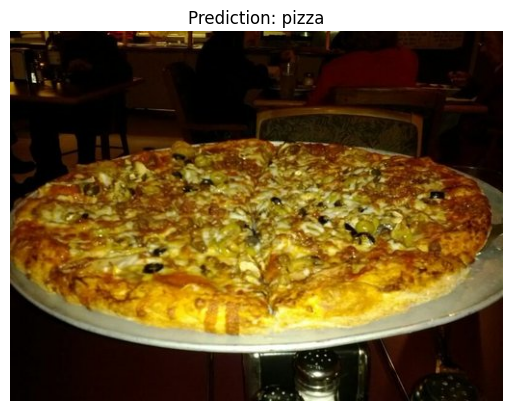

In [9]:
# Question 3. Predict on your own image of pizza/steak/sushi - how does the model go? What happens if you predict on an image that isn't pizza/steak/sushi?
from PIL import Image
from google.colab import files

uploaded = files.upload()

image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert("RGB")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

img_tensor = transform(image).unsqueeze(0).to(device)

model.eval()
with torch.no_grad():
    output = model(img_tensor)
    pred = torch.argmax(output, dim=1)

print(f"Predicted: {class_names[pred.item()]}")
plt.imshow(image)
plt.title(f"Prediction: {class_names[pred.item()]}")
plt.axis('off')
plt.show()


In [11]:
# Question 4 and 5. Train the model from section 4 above for longer (10 epochs should do), what happens to the performance?

train_data = datasets.ImageFolder(root='/content/data/pizza_steak_sushi/train', transform=transform)
test_data = datasets.ImageFolder(root='/content/data/pizza_steak_sushi/test', transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [12]:
# Question 6. Try a different model from torchvision.models on the Pizza, Steak, Sushi data, how does this model perform?
#You'll have to change the size of the classifier layer to suit our problem.
#You may want to try an EfficientNet with a higher number than our B0, perhaps torchvision.models.efficientnet_b2()?

model = models.efficientnet_b2(pretrained=True)
for param in model.features.parameters():
    param.requires_grad = False
model.classifier = nn.Sequential(
    nn.Dropout(0.3),
    nn.Linear(1408, len(class_names))
)
model = model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B2_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b2_rwightman-c35c1473.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b2_rwightman-c35c1473.pth
100%|██████████| 35.2M/35.2M [00:00<00:00, 118MB/s]


In [13]:
# Define Loss, Optimizer, Metrics
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracy = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)
val_accuracy = Accuracy(task="multiclass", num_classes=len(class_names)).to(device)


In [14]:
# Training + Evaluation Loop
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

NUM_EPOCHS = 10

for epoch in range(NUM_EPOCHS):
    model.train()
    train_loss = 0
    train_acc = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        preds = torch.argmax(y_pred, dim=1)
        train_accuracy.update(preds, y)

    avg_train_loss = train_loss / len(train_loader)
    avg_train_acc = train_accuracy.compute().item()

    model.eval()
    test_loss = 0
    test_acc = 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            test_loss += loss.item()

            preds = torch.argmax(y_pred, dim=1)
            val_accuracy.update(preds, y)

    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = val_accuracy.compute().item()

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    train_accuracies.append(avg_train_acc)
    test_accuracies.append(avg_test_acc)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} | "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f} | "
          f"Val Loss: {avg_test_loss:.4f}, Val Acc: {avg_test_acc:.4f}")

    # Reset metrics
    train_accuracy.reset()
    val_accuracy.reset()


Epoch 1/10 | Train Loss: 1.0380, Train Acc: 0.4622 | Val Loss: 0.8830, Val Acc: 0.7467
Epoch 2/10 | Train Loss: 0.8356, Train Acc: 0.6267 | Val Loss: 0.8051, Val Acc: 0.8000
Epoch 3/10 | Train Loss: 0.8371, Train Acc: 0.6844 | Val Loss: 0.7426, Val Acc: 0.8533
Epoch 4/10 | Train Loss: 0.6861, Train Acc: 0.8622 | Val Loss: 0.6645, Val Acc: 0.8933
Epoch 5/10 | Train Loss: 0.6690, Train Acc: 0.8889 | Val Loss: 0.6366, Val Acc: 0.8933
Epoch 6/10 | Train Loss: 0.5834, Train Acc: 0.9200 | Val Loss: 0.6231, Val Acc: 0.8800
Epoch 7/10 | Train Loss: 0.4917, Train Acc: 0.8978 | Val Loss: 0.6206, Val Acc: 0.8933
Epoch 8/10 | Train Loss: 0.5537, Train Acc: 0.8889 | Val Loss: 0.6039, Val Acc: 0.8933
Epoch 9/10 | Train Loss: 0.5503, Train Acc: 0.9156 | Val Loss: 0.5270, Val Acc: 0.8667
Epoch 10/10 | Train Loss: 0.4834, Train Acc: 0.9378 | Val Loss: 0.4874, Val Acc: 0.9067


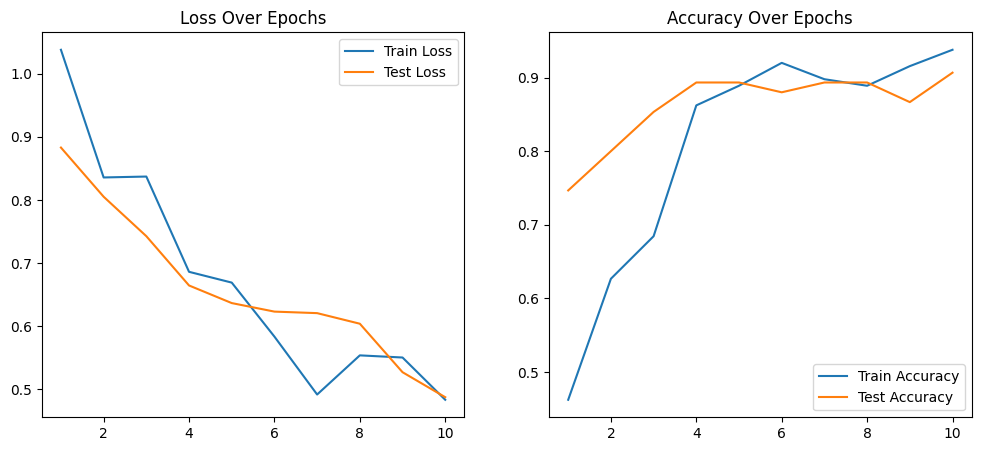

In [15]:
# Plot Loss and Accuracy Curves
epochs_range = range(1, NUM_EPOCHS+1)

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, test_losses, label='Test Loss')
plt.legend()
plt.title('Loss Over Epochs')

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs_range, train_accuracies, label='Train Accuracy')
plt.plot(epochs_range, test_accuracies, label='Test Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.show()
